In [4]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import InceptionV3
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.layers import concatenate, MaxPooling2D,Input
from tensorflow.keras.layers import Dense, Flatten, Conv2D, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical

## Loading Data

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

## Preprocessing

In [5]:
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img


x_train_resized = [array_to_img(img, scale=False).resize((75, 75)) for img in x_train]
x_test_resized = [array_to_img(img, scale=False).resize((75, 75)) for img in x_test]


x_train_resized = [img_to_array(img) for img in x_train_resized]
x_test_resized = [img_to_array(img) for img in x_test_resized]

x_train_resized = np.array(x_train_resized) / 255.0
x_test_resized = np.array(x_test_resized) / 255.0

In [6]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Model

In [7]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))
base_model.trainable = False

In [8]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 22,857,002
Trainable params: 1,054,218
Non-trainable params: 21,802,784
_________________________________________________________________


In [12]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train_resized, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 217s 136ms/step - loss: 1.0792 - accuracy: 0.6232
Epoch 2/5
1563/1563 [==============================] - 208s 133ms/step - loss: 0.8785 - accuracy: 0.6920
Epoch 3/5
1563/1563 [==============================] - 206s 132ms/step - loss: 0.7147 - accuracy: 0.7479
Epoch 4/5
1563/1563 [==============================] - 205s 131ms/step - loss: 0.5392 - accuracy: 0.8108
Epoch 5/5
1563/1563 [==============================] - 206s 132ms/step - loss: 0.3823 - accuracy: 0.8688


## Confusion Matrix

In [13]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(np.argmax(y_test,axis=1),np.argmax(model.predict(x_test_resized),axis=1),labels=list(np.arange(0,10)))

313/313 [==============================] - 35s 107ms/step


Text(0.5, 51.0, 'Predicted label')

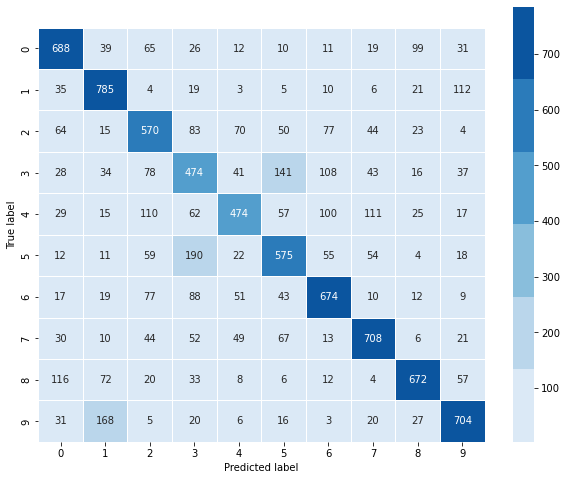

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(confusion, annot=True,ax=ax,fmt="d",linewidths=.5,cmap=sns.color_palette("Blues"));
plt.ylim([ 10,-0.5,]);
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Precision, Recall, F1-score

In [15]:
from sklearn.metrics import classification_report
target_names = ["Class 0", "Class 1", "Class 2", "Class 3", "Class 4", "Class 5", "Class 6", "Class 7", "Class 8", "Class 9"]
print(classification_report(np.argmax(y_test,axis=1),np.argmax(model.predict(x_test_resized),axis=1), target_names=target_names))

313/313 [==============================] - 39s 125ms/step
              precision    recall  f1-score   support

     Class 0       0.66      0.69      0.67      1000
     Class 1       0.67      0.79      0.72      1000
     Class 2       0.55      0.57      0.56      1000
     Class 3       0.45      0.47      0.46      1000
     Class 4       0.64      0.47      0.55      1000
     Class 5       0.59      0.57      0.58      1000
     Class 6       0.63      0.67      0.65      1000
     Class 7       0.69      0.71      0.70      1000
     Class 8       0.74      0.67      0.71      1000
     Class 9       0.70      0.70      0.70      1000

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.63     10000
weighted avg       0.63      0.63      0.63     10000

